# CAR ACCIDENT SEVERITY ANALYSIS OF SEATTLE CITY
## Introduction
The purpose of this study is to try to understand the factors that contribute to the severity factor of a vehicle collision in the city of Seattle by using the data from the city of Seattle recorded between the years 2004 and 2020. In order to predict the severity of the collision based on various factors such as road and wet conditions in dataset, different machine learning algortihms were developed.Based on the understanding the impact of different factors on the collision outcome,  it is hoped to provide meaningfull insights into how to prevent such collisions so that the drivers can be alerted in advance. After Explatory Data Analysis and Data Cleaning, predictive models were developed and evaluated by different metrics 

## Data
The data for this project was provided by IBM's Applied Data Science Capstone Project. This dataset includes many features to build a robust predictive machine learning algorithms. This data contains all types of collisions which occurred between the years of 2004 and 2020 in the city of Seattle. It has a total of 194673 records and 38 different attributes

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [64]:
df = pd.read_csv('Data-Collisions.csv')

## Explatory Data Analysis

In [65]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [66]:
df.shape

(194673, 38)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [68]:
df_time = df[['SEVERITYCODE', 'INCDTTM']]
df_time.head()

,SEVERITYCODE,INCDTTM
0,2,3/27/2013 2:54:00 PM
1,1,12/20/2006 6:55:00 PM
2,1,11/18/2004 10:20:00 AM
3,1,3/29/2013 9:26:00 AM
4,2,1/28/2004 8:04:00 AM


In [69]:
df_time['INCDTTM'] = pd.to_datetime(df_time['INCDTTM'])
df_time['YEAR'] = df_time['INCDTTM'].dt.year.astype('int64')
df_time['MONTH'] = df_time['INCDTTM'].dt.month.astype('int64')
df_time['HOUR'] = df_time['INCDTTM'].dt.hour.astype('int64')
df_time.head()

,SEVERITYCODE,INCDTTM,YEAR,MONTH,HOUR
0,2,2013-03-27 14:54:00,2013,3,14
1,1,2006-12-20 18:55:00,2006,12,18
2,1,2004-11-18 10:20:00,2004,11,10
3,1,2013-03-29 09:26:00,2013,3,9
4,2,2004-01-28 08:04:00,2004,1,8


In [70]:
def catplot_show(column, hue, df):
  g = sns.catplot(column, data=df, aspect=2.0, kind='count', hue=hue, legend = False)
  g.set_xticklabels(rotation=45, fontsize=12)
  g.set_yticklabels(fontsize=12)
  g.set_xlabels(column, fontsize=12, labelpad = 16)
  g.set_ylabels('Number of Collisions', fontsize=12, labelpad = 16)
  legend = plt.legend(title='SEVERITY', loc=(1,1), fontsize=12)
  legend.get_title().set_fontsize('16')
  plt.show()
  return g

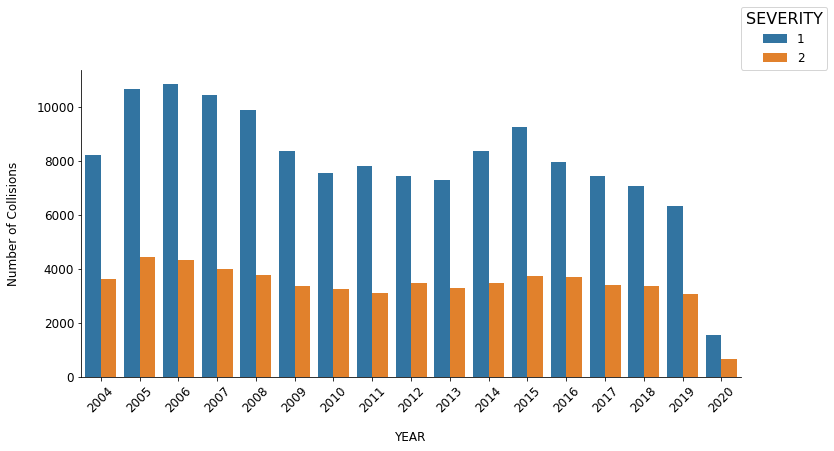

In [71]:
catplot_show('YEAR', 'SEVERITYCODE', df_time);

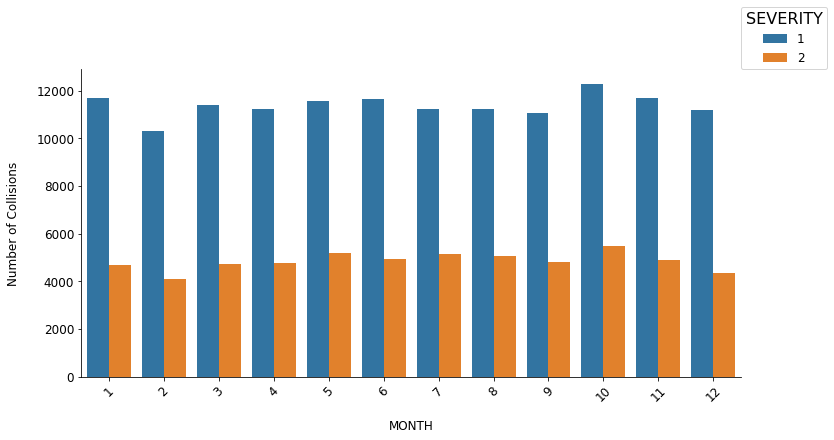

In [72]:
catplot_show('MONTH', 'SEVERITYCODE', df_time);

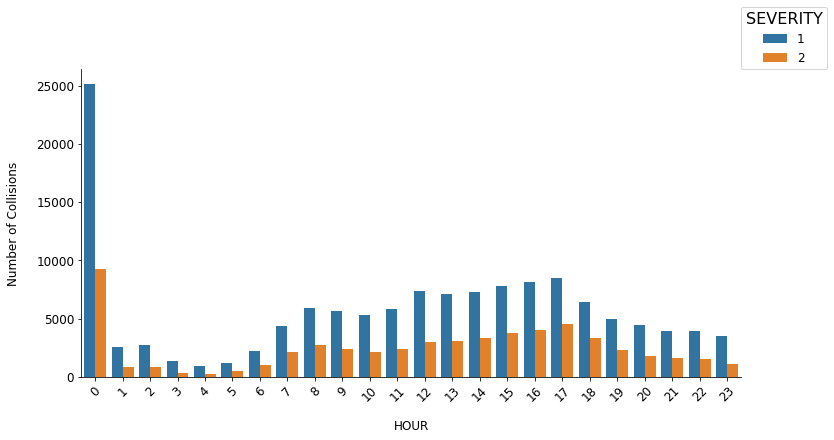

In [73]:
catplot_show('HOUR', 'SEVERITYCODE', df_time);

# Feature Selection & Data Cleaning

In [74]:
df_model = df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING']].copy()

In [75]:
df_model.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,SPEEDING
0,2,Overcast,Wet,Daylight,Angles,NaN,N,NaN
1,1,Raining,Wet,Dark - Street Lights On,Sideswipe,NaN,0,NaN
2,1,Overcast,Dry,Daylight,Parked Car,NaN,0,NaN
3,1,Clear,Dry,Daylight,Other,NaN,N,NaN
4,2,Raining,Wet,Daylight,Angles,NaN,0,NaN


In [76]:
df_model.fillna({'INATTENTIONIND':'N','SPEEDING':'N'},inplace=True)
df_model['UNDERINFL'].replace({'0':'N', np.nan:'N', '1':'Y'}, inplace=True)
df_model.fillna({'COLLISIONTYPE':'Other', 'WEATHER':'Other', 'ROADCOND':'Unknown', 'LIGHTCOND':'Unknown'},inplace=True)

In [77]:
df_model.isnull().sum()

SEVERITYCODE      0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
COLLISIONTYPE     0
INATTENTIONIND    0
UNDERINFL         0
SPEEDING          0
dtype: int64

In [78]:
def catplot_show(column, hue, df):
  g = sns.catplot(orient = 'h', y = column, data=df, aspect=2.0, kind='count', hue=hue, legend = False)
  g.set_xticklabels(rotation=45, fontsize=12)
  g.set_yticklabels(fontsize=12)
  g.set_ylabels(column, fontsize=12, labelpad = 16)
  g.set_xlabels('Number of Collisions', fontsize=12, labelpad = 16)
  legend = plt.legend(title='SEVERITY', loc=(1,1), fontsize=12)
  legend.get_title().set_fontsize('16')
  plt.show()
  return g

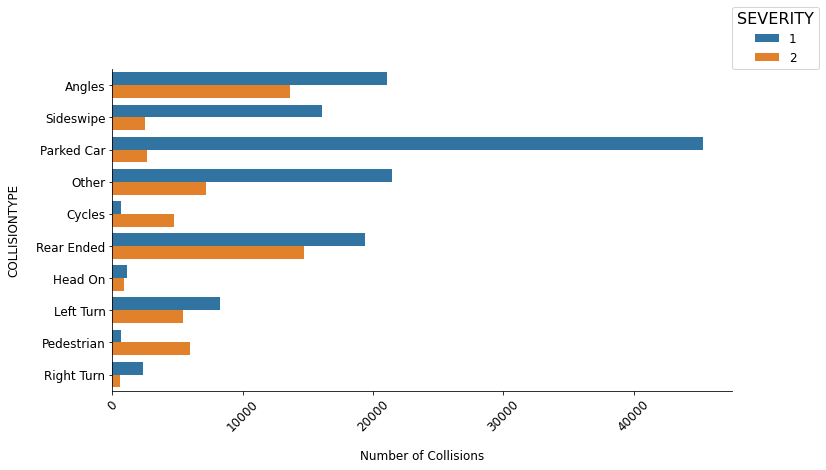

In [79]:
catplot_show('COLLISIONTYPE', 'SEVERITYCODE', df_model);

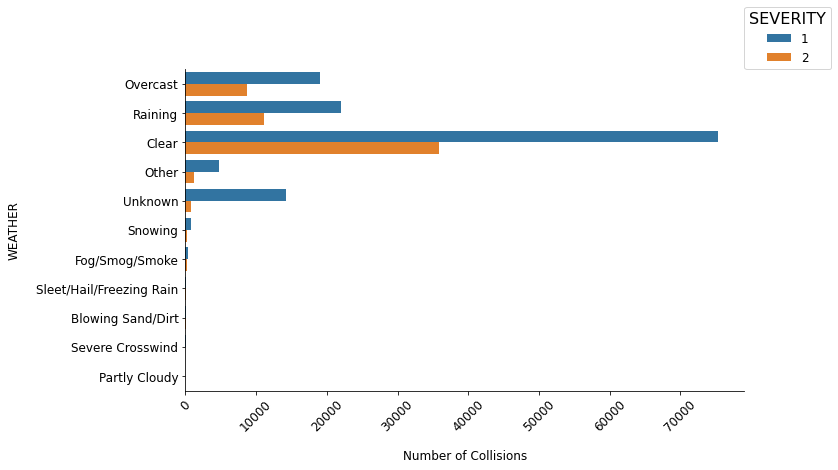

In [80]:
catplot_show('WEATHER', 'SEVERITYCODE', df_model);

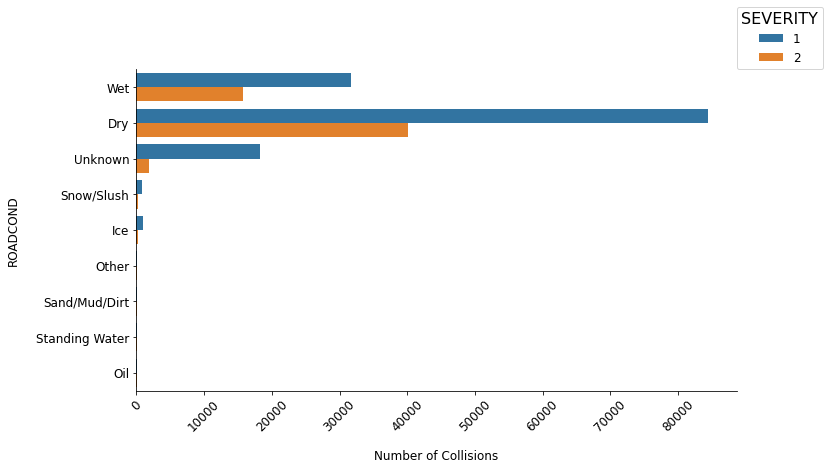

In [81]:
catplot_show('ROADCOND', 'SEVERITYCODE', df_model);

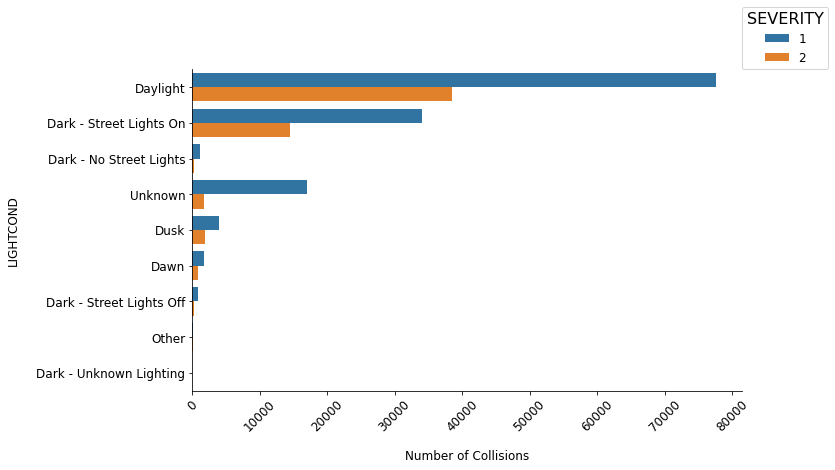

In [82]:
catplot_show('LIGHTCOND', 'SEVERITYCODE', df_model);

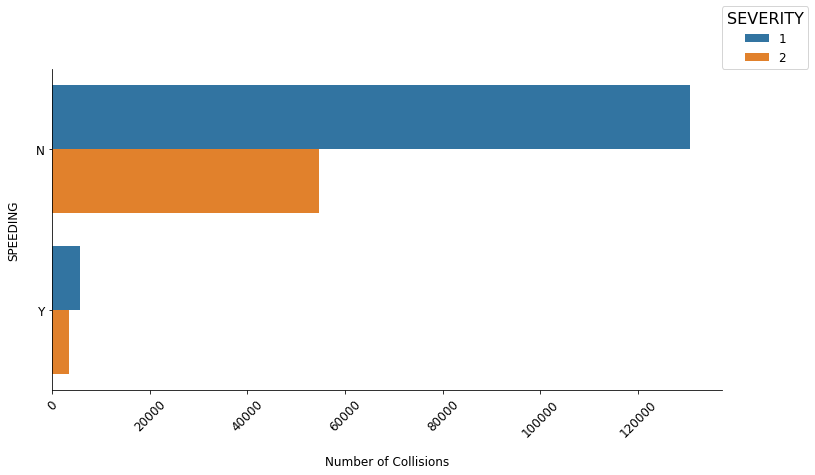

In [83]:
catplot_show('SPEEDING', 'SEVERITYCODE', df_model);

# Lable Encoding

In [84]:
dichotomy_cols = ['INATTENTIONIND', 'UNDERINFL', 'SPEEDING']
for value in dichotomy_cols: df_model[value].replace({'Y':1, 'N': 0}, inplace=True)

In [85]:
cat_cols = ['COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']
df_model = pd.get_dummies(data=df_model, columns=cat_cols)
df_model.head()

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,SPEEDING,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [86]:
df_model.isnull().sum()

SEVERITYCODE                          0
INATTENTIONIND                        0
UNDERINFL                             0
SPEEDING                              0
COLLISIONTYPE_Angles                  0
COLLISIONTYPE_Cycles                  0
COLLISIONTYPE_Head On                 0
COLLISIONTYPE_Left Turn               0
COLLISIONTYPE_Other                   0
COLLISIONTYPE_Parked Car              0
COLLISIONTYPE_Pedestrian              0
COLLISIONTYPE_Rear Ended              0
COLLISIONTYPE_Right Turn              0
COLLISIONTYPE_Sideswipe               0
WEATHER_Blowing Sand/Dirt             0
WEATHER_Clear                         0
WEATHER_Fog/Smog/Smoke                0
WEATHER_Other                         0
WEATHER_Overcast                      0
WEATHER_Partly Cloudy                 0
WEATHER_Raining                       0
WEATHER_Severe Crosswind              0
WEATHER_Sleet/Hail/Freezing Rain      0
WEATHER_Snowing                       0
WEATHER_Unknown                       0


# Model Development

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [88]:
X = df_model.drop('SEVERITYCODE', axis=1)
y = df_model['SEVERITYCODE']
X.shape, y.shape

((194673, 42), (194673,))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)
X_train.shape, X_test.shape

((155738, 42), (38935, 42))

## Decision Tree

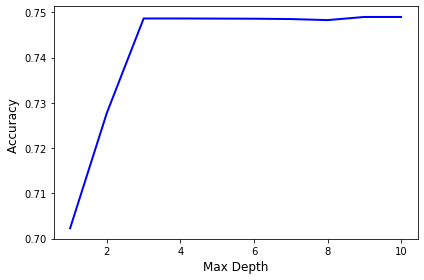

In [93]:
depth = 11
accuracy_score = []
for d in range(1,depth):
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_test)
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(range(1,depth),accuracy_score,'blue', lw = 2)
plt.ylabel('Accuracy ',fontsize =12)
plt.xlabel('Max Depth',fontsize =12)
plt.tight_layout()
plt.show()

In [96]:
dtc_tuned = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtc_tuned.fit(X_train,y_train)
y_pred_tuned = dtc_tuned.predict(X_test)
dtc_tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')
dtc_tuned_accuracy = metrics.accuracy_score(y_test, y_pred_tuned)
print('f1 Score: ', dtc_tuned_f1)
print('Accuracy Score: ', dtc_tuned_accuracy)

f1 Score:  0.6834136745809289
Accuracy Score:  0.7486580197765507


## KNN Model

In [97]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
knn_f1_score = f1_score(y_test,y_pred_knn, average='weighted')
knn_accuracy_score = metrics.accuracy_score(y_test,y_pred_knn)
print('f1 Score: ', knn_f1_score)
print('Accuracy Score: ', knn_accuracy_score)

f1 Score:  0.6875196226164535
Accuracy Score:  0.7296776679080519


## Logistic Regression

In [98]:
log_reg=LogisticRegression(C=0.01,solver='liblinear')
log_reg.fit(X_train,y_train)
y_pred_log_reg=log_reg.predict(X_test)
log_reg_f1_score = f1_score(y_test,y_pred_log_reg, average='weighted')
log_reg_accuracy_score = metrics.accuracy_score(y_test,y_pred_log_reg)
print('f1 Score: ', log_reg_f1_score)
print('Accuracy Score: ', log_reg_accuracy_score)

f1 Score:  0.6925745007229589
Accuracy Score:  0.747938872479774


## Gradient Boosting

In [99]:
gbm=GradientBoostingClassifier(max_depth = 4)
gbm.fit(X_train,y_train)
y_pred_gbm=gbm.predict(X_test)
gbm_f1_score = f1_score(y_test,y_pred_gbm, average='weighted')
gbm_accuracy_score = metrics.accuracy_score(y_test,y_pred_gbm)
print('f1 Score: ', gbm_f1_score)
print('Accuracy Score: ', gbm_accuracy_score)

f1 Score:  0.6888202623487371
Accuracy Score:  0.7491203287530499


## Random Forests

In [100]:
rf=RandomForestClassifier(max_depth = 10)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
rf_f1_score = f1_score(y_test,y_pred_rf, average='weighted')
rf_accuracy_score = metrics.accuracy_score(y_test,y_pred_rf)
print('f1 Score: ', rf_f1_score)
print('Accuracy Score: ', rf_accuracy_score)

f1 Score:  0.6836761640159316
Accuracy Score:  0.7487607551046617


## Model Comparison

In [103]:
scores={'Model':['Decision Tree','KNN','Logistic Regression', 'Gradient Boosting', 'Random Forests'],
    'F1 Score': [dtc_tuned_f1,knn_f1_score,log_reg_f1_score, gbm_f1_score, rf_f1_score],
    'Accuracy': [dtc_tuned_accuracy,knn_accuracy_score,log_reg_accuracy_score,gbm_accuracy_score,rf_accuracy_score]}

scores=pd.DataFrame(scores)
scores

,Model,F1 Score,Accuracy
0,Decision Tree,0.683414,0.748658
1,KNN,0.687520,0.729678
2,Logistic Regression,0.692575,0.747939
3,Gradient Boosting,0.688820,0.749120
4,Random Forests,0.683676,0.748761


## Coclusion
The selected features from the dataset have been used to classify the severity of the accidents. 
Five different machine learning algoritms were developed, namely, Decision Tree, KNN, Random Forests, Logistic Regression, and Gradient Boosting. Based on the accuracy scores, the Gradient Boosting algorithm offers the best performing model with a accuracy score of 0.7491. 
Explatory data anlaysis indicates that the most vehicle accidents occur in a clear and dry roads during the day. Therefore, 
it is important to emphasize that Seattle Transportation Agency should emphasis more on the drivers' training in terms of accidents. 
